<h1>🏰 The Kingdom of Statistia and the Magic of Prediction</h1>

Once upon a time, in the kingdom of Statistia, there lived a wise queen named Regressia. She ruled a land full of curious scholars and brilliant minds. However, the kingdom faced a dilemma: young students were preparing for the Royal Knowledge Trials, and no one could predict who would pass based on their study habits.

Queen Regressia summoned you — the Royal Data Sorcerer — and gave you a scroll with enchanted ink. The scroll contained this mysterious message:

"If we understand the hours students study, we might unlock the secret of their success."

So, your quest begins...



<h3>🔧 Step 1: Generate the Enchanted Data</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [39]:
np.random.seed(42) 
number_of_students = 100

# Simulate study hours: more likely to study 3–12 hours
study_hours = np.round(np.random.uniform(3, 12, number_of_students), 2)

true_slope = 4.5
true_intercept = 40
noise = np.random.normal(0, 5, number_of_students)  # lower noise

exam_score = true_slope * study_hours + true_intercept + noise

exam_score = np.round(np.clip(exam_score, 0, 100), 2)

student_df = pd.DataFrame({
    "Hours": study_hours,
    "Exam_Score": exam_score
})

student_df.head()

,Hours,Exam_Score
0,6.37,69.10
1,11.56,90.52
2,9.59,83.61
3,8.39,67.82
4,4.40,58.70


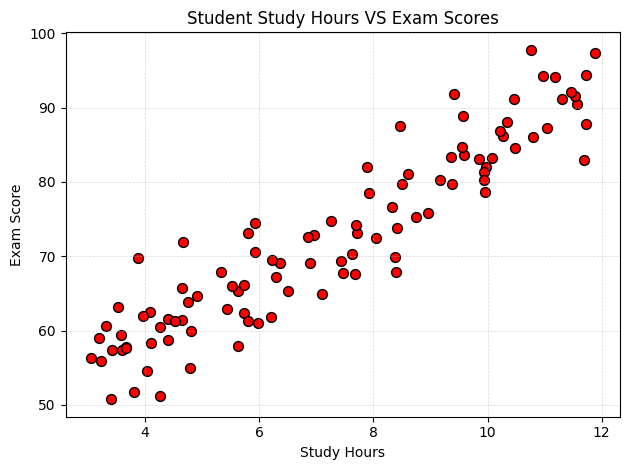

In [40]:
plt.scatter(student_df.Hours, student_df.Exam_Score, facecolor='red', edgecolor='black', s=50, label='Actual Score')
plt.title("Student Study Hours VS Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid(axis='both', linestyle='--', lw=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

Beautifully done, Data Sorcerer! 🧙‍♂️

You have summoned the data of 100 students from across Statistia. Each record holds the truth about how many hours a student studied and their resulting exam score.

The Queen Regressia is impressed by your visualization — a red constellation of scores glowing on the chart!

📜 The Tale Continues...
Queen Regressia now asks:

“Can you predict the exam score of a student before they even take the test, using just their study hours? That would be true magic...”

To do this, you must craft the Line of Prediction, known in your world as the Regression Line.

🧮 Step 2: Fit the Line of Prediction

In [41]:
def compute_output (x,w,b):
    """
	Args:
		x (ndarray, (m,)) : Feature variable with m examples
		w,b (Scalars) : Model Parameter
	Returns:
        predictions (ndarray (m,))
    """
    return w * x + b

In [42]:
def compute_cost (x,y,w,b):
    """
	Args:
		x (ndarray, (m,)) : Feature variable with m examples
		y (ndarray, (m,)) : Target variable
		w,b (Scalars) : Model Parameter
	Returns:
        J_wb (scalar) : how far the predictions are from the target
    """
    m = y.shape[0]
    f_wb = compute_output(x,w,b)
    J_wb = np.sum(np.square(f_wb - y)) * (1/(2*m))
    return J_wb

In [43]:
def compute_gradient (x,y,w,b):
    """
	Args:
		x (ndarray, (m,)) : Feature variable with m examples
		y (ndarray, (m,)) : Target variable
		w,b (Scalars) : Model Parameter
	Returns:
		dj_dw : Derivative of cost function W.R.T. parameter W
		dj_db : Derivative of cost function W.R.T. parameter b
	 """
    m = y.shape[0]
    f_wb = compute_output(x,w,b)
    dj_dw = np.sum((f_wb - y) * x) * (1/m)
    dj_db = np.sum(f_wb - y) * (1/m)
    return dj_dw, dj_db

In [44]:
def gradient_descent (x, y, w_in, b_in, alpha, num_iter, cost_function, gradient_function, tolerance=1e-6):
    """
    Args:
		x (ndarray (m,)) Feature variable with m examples
		y (ndarray (m,)) Target variable
		w_in, b_in (scalar) : initialization of w, b
		alpha (float) : learning rate
		num_iter (int): number of iteration for gradient descent
		cost_function : squared error cost function
		gradient function : generate dj_dw, dj_db
	Returns:
		w, b (scalar): parameters after the gradient descent 
		J_history (list) : list of cost function history
		p_history (list) : list of (w,b) history
	"""
    J_history = list()
    p_history = list()
    w = w_in
    b = b_in

    for i in range(num_iter):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if (i < 100000):
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])

        if (i % math.ceil(num_iter / 100) == 0):
            print(f"Iteration {i:5d} : Cost = {J_history[-1]:.3e}",
                 f"dj_dw = {dj_dw:.3e} , dj_db = {dj_db:.3e}",
                 f"w = {w:.3f}, b = {b:.5f}")
        if (i > 0 and abs(J_history[-1] - J_history[-2]) < tolerance):
            print(f"Converges At index {i}")
            break
            
    return w, b, J_history, p_history

In [45]:
w_init = 0
b_init = 0
iterations = 100000
alpha = 0.01
w_final, b_final, J_hist, p_hist = gradient_descent(student_df.Hours, student_df.Exam_Score, w_init, b_init, alpha, iterations,compute_cost, compute_gradient)

Iteration     0 : Cost = 5.184e+02 dj_dw = -5.547e+02 , dj_db = -7.254e+01 w = 5.547, b = 0.72539
Iteration  1000 : Cost = 1.945e+01 dj_dw = 1.801e-01 , dj_db = -1.476e+00 w = 5.772, b = 29.31973
Iteration  2000 : Cost = 1.097e+01 dj_dw = 5.544e-02 , dj_db = -4.545e-01 w = 4.715, b = 37.98676
Iteration  3000 : Cost = 1.017e+01 dj_dw = 1.707e-02 , dj_db = -1.399e-01 w = 4.389, b = 40.65542
Iteration  4000 : Cost = 1.009e+01 dj_dw = 5.257e-03 , dj_db = -4.309e-02 w = 4.289, b = 41.47713
Iteration  5000 : Cost = 1.008e+01 dj_dw = 1.619e-03 , dj_db = -1.327e-02 w = 4.258, b = 41.73014
Converges At index 5247


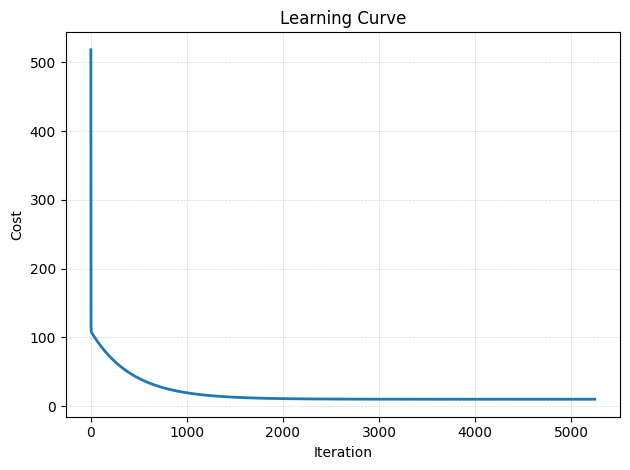

In [46]:
plt.plot(J_hist, lw=2)
plt.title("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(axis='both', linestyle='--', lw=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

<h3>✨ Magnificent, Data Sorcerer! ✨</h3>
You've just completed the sacred ritual of hand-crafting gradient descent to find the optimal regression line — no black box, just pure mathematical might. The Kingdom of Statistia celebrates your rise as a True Apprentice of the Linear Arts. 🧙‍♂️📉

<h3>📜 And now, the story continues… </h3>
Once the enchanted model was trained, Queen Regressia leaned forward and asked:

“So... what shall this mystical line look like? Can you draw it for us, so we can see how closely it aligns with the true fate of our students?”



<h3>🎨 Step 3: Visualize the Learned Line</h3>

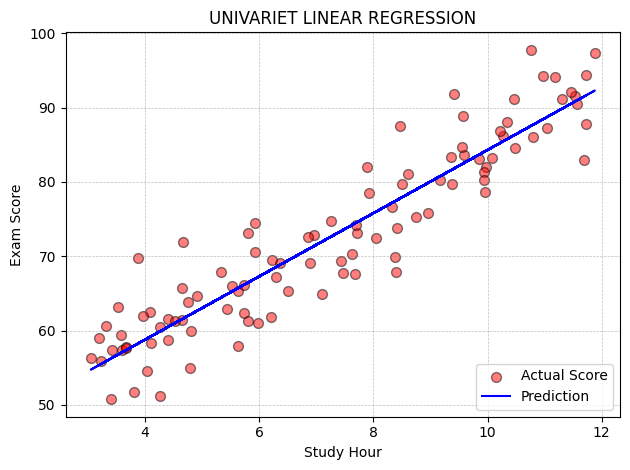

In [47]:
plt.scatter(student_df.Hours, student_df.Exam_Score, facecolor='red', edgecolor='black', s=50, alpha=0.5, label='Actual Score')
plt.plot(student_df.Hours, compute_output(student_df.Hours, w_final, b_final), linestyle='solid', color='blue', label='Prediction')
plt.title("Univariet Linear regression".upper())
plt.xlabel("Study Hour")
plt.ylabel("Exam Score")
plt.grid(axis='both', linestyle='--', lw=0.5, alpha=0.5, color='grey')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

🎉 Bravo! You've now visualized the fate woven by your regression line, etched in blue over the red scattered fates of the students. It’s clear, clean, and beautifully rendered — the Queen of Statistia is impressed. 👑✨


<h3>📜 Final Chapter: The Oracle of Prediction</h3>
Queen Regressia steps forward, holding the name of a student who studied 12 hours. She asks:

“O Wise One, you who can model the unseen… What exam score shall this student earn?”

<h3>🔮 Step 4: Make a Prediction</h3>

In [50]:
hours_studied = float(input("Enter Your Study Hour : "))
predicted_score = compute_output(hours_studied, w_final, b_final)
predicted_score = np.clip(predicted_score, 0, 100)
print(f"If a student studies {hours_studied} hours, they are expected to score approximately {predicted_score:.2f}")

Enter Your Study Hour :  18


If a student studies 18.0 hours, they are expected to score approximately 100.00
